In [1]:
import sys  
sys.path.insert(0, 'C:\\Users\\rmnso\\PycharmProjects\\bakalarkaFY')
sys.path.insert(0, 'C:\\Users\\rmnso\\PycharmProjects\\bakalarkaFY\\Brusselator')
import os
os.chdir("C:\\Users\\rmnso\\PycharmProjects\\bakalarkaFY\\Brusselator")
from solver import solve_numerical, solve_generic, solve_numerical_EN
from input_parser import parse_input_file, parse_table

In [185]:
all_species, parameters, reactions, tables = parse_input_file('brusselator.input')

In [186]:
def update(parameters, time):  # replenishes A, B reservoirs
    parameters['A'] = 1
    parameters['B'] = 3

In [192]:
times, values = solve_generic(all_species, parameters, reactions, update=update)

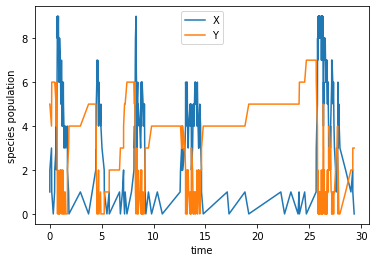

In [201]:
import matplotlib.pyplot as plt
for species in ['X', 'Y']:
    plt.plot(times, values[species], label=species)
plt.legend()
plt.xlabel('time')
plt.ylabel('species population')
plt.savefig('graphs/brusselator_mc.png', dpi=512)

In [14]:
def print_out(run, time, parameters):
    print(f"run: {run}, time: {time}, parameters")
times, values = solve_generic(all_species, parameters, reactions, update=update, ERW=True)

In [102]:
from scipy.integrate import solve_ivp
def numerical_solver(ratio=1):
    A = 1*ratio
    B = 3*ratio
    k2 = 1/ratio/ratio
    k3 = 1/ratio
    def fun(t, concentrations):
        X, Y = concentrations
        return [A + k2*X*X*Y - k3*B*X - X, k3*B*X - k2*X*X*Y]
    sol = solve_ivp(fun, (0, 30), (1*ratio, 1*ratio))
    return sol.t, {'X': sol.y[0], 'Y': sol.y[1]}

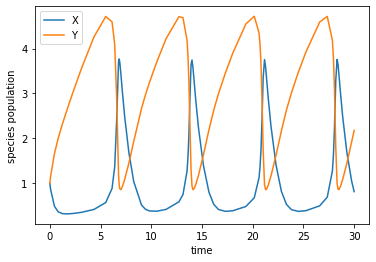

In [200]:
timesNum, valuesNum = numerical_solver(ratio=1)
for species in ['X', 'Y']:
    plt.plot(timesNum, valuesNum[species], label=species)
plt.legend()
plt.xlabel('time')
plt.ylabel('species population')
plt.savefig('graphs/brusselator_det.png', dpi=512)

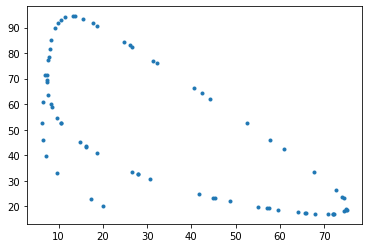

In [124]:
plt.plot(valuesNum['X'], valuesNum['Y'], '.')

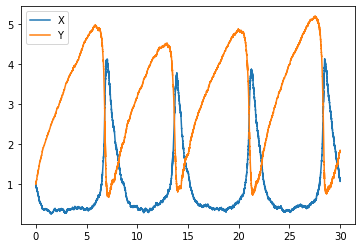

In [159]:
def MC(ratio):
    all_species, parameters, reactions, tables = parse_input_file('brusselator.input')
    ratio = 400
    reactions[1].rate_fun = lambda _: 1/ratio/ratio
    reactions[2].rate_fun = lambda _: 1/ratio
    parameters['X'] = parameters['Y'] = ratio
    parameters['A'] = 1*ratio
    parameters['B'] = 3*ratio
    parameters['time_end'] = 30
    def update(parameters, time):  # replenishes A, B reservoirs
        parameters['A'] = 1*ratio
        parameters['B'] = 3*ratio
    def print_out(run, time, parameters):
        if run % 1000 == 0:
            print(time, parameters['X'], parameters['Y'])
    times, values = solve_generic(all_species, parameters, reactions, update=update, print_out=None)
    values['Y'] = np.array(values['Y']) / ratio
    values['X'] = np.array(values['X']) / ratio
    return values['X'], values['Y']
for species in ['X', 'Y']:
    plt.plot(times, values[species], label=species)
plt.legend()

Text(0, 0.5, '$\\left[ \\rm Y \\right]$')

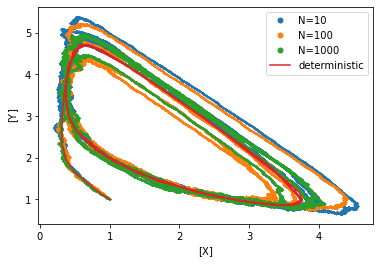

In [206]:
x10, y10 = MC(10)
x100, y100 = MC(1000)
x1000, y1000 = MC(10000)
# values['Y'] = np.array(values['Y']) / ratio
# values['X'] = np.array(values['X']) / ratio
# valuesNum['X'] = np.array(valuesNum['X']) / ratio
# valuesNum['Y'] = np.array(valuesNum['Y']) / ratio
#plt.plot(values['X'], values['Y'], '.')
plt.plot(x10, y10, '.', markersize=1, label='N=10')
plt.plot(x100, y100, '.', markersize=1, label='N=100')
plt.plot(x1000, y1000, '.', markersize=1, label='N=1000')
plt.plot(valuesNum['X'], valuesNum['Y'], '-',  markersize=10, label='deterministic')
lgnd = plt.legend()
lgnd.legendHandles[0]._legmarker.set_markersize(10)
lgnd.legendHandles[1]._legmarker.set_markersize(10)
lgnd.legendHandles[2]._legmarker.set_markersize(10)
plt.xlabel('$\\left[ \\rm X \\right]$')
plt.ylabel('$\\left[ \\rm Y \\right]$')
#plt.savefig('graphs/brusselator_diffN.png', dpi=512)